In [1]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Set defaults for charts so they aren't so tiny!
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,5]

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import csv
import sklearn.covariance
import sklearn.linear_model
import scipy.stats

In [16]:
with open('adaptive_gamma_results.csv', 'rt') as file:
    reader = csv.DictReader(file)
    results = list([dict(item) for item in reader])
    
results = [{key:float(item) for key,item in result.items()} for result in results]
for result in results:
    result['stdvsmedian'] = result['std'] / result['median']
    result['stdvsmin'] = result['std'] / result['min']

lossKeys = ['gamma_0.25', 'gamma_1.0', 'gamma_adaptive_20', 'gamma_adaptive_40', 'gamma_adaptive_60', 'gamma_adaptive_80']
adaptiveKeys = ['gamma_adaptive_20', 'gamma_adaptive_40', 'gamma_adaptive_60', 'gamma_adaptive_80']
    
for result in results:
    best = min(lossKeys, key=lambda key: result[key])
    result['best'] = best

    best = min(adaptiveKeys, key=lambda key: result[key])
    result['adaptBest'] = best
    result['bestSize'] = float(best[len('gamma_adaptive_'):])
    
    
nonFeatureKeys=['gamma', 'loss', 'min', 'median', 'max']
    
features = [{key:value for key,value in result.items() if key not in nonFeatureKeys} for result in results]
pd.DataFrame(features)

,adaptBest,best,best/median,bestSize,gamma_0.25,gamma_1.0,gamma_adaptive_20,gamma_adaptive_40,gamma_adaptive_60,gamma_adaptive_80,kurtosis,range,skew,std,stdvsmedian,stdvsmin
0,gamma_adaptive_60,gamma_adaptive_60,0.832802,60.0,0.211041,0.199805,0.197365,0.202711,0.195583,0.201170,3.108443,0.354210,1.797392,0.062770,0.261414,0.314154
1,gamma_adaptive_80,gamma_adaptive_80,0.764979,80.0,0.143120,0.144859,0.145463,0.141858,0.142300,0.141423,4.336491,0.328914,1.871132,0.067266,0.354305,0.464355
2,gamma_adaptive_60,gamma_adaptive_60,0.883258,60.0,0.272213,0.262131,0.268115,0.264085,0.261180,0.265519,3.857113,0.386321,1.912905,0.049979,0.168167,0.190664
3,gamma_adaptive_60,gamma_1.0,0.889138,60.0,0.284877,0.275583,0.276482,0.276748,0.275679,0.276545,4.366863,0.387039,1.816035,0.038205,0.123214,0.138635
4,gamma_adaptive_60,gamma_adaptive_60,0.855315,60.0,0.281349,0.267466,0.270275,0.268684,0.265436,0.271369,2.389286,0.389623,1.584325,0.048986,0.156676,0.183148
5,gamma_adaptive_80,gamma_1.0,0.670723,80.0,0.103527,0.097938,0.101489,0.102642,0.102568,0.100913,3.907917,0.340887,1.922655,0.095319,0.648080,0.973250
6,gamma_adaptive_60,gamma_adaptive_60,0.893862,60.0,0.341510,0.323968,0.328310,0.325141,0.322768,0.325532,1.907287,0.421290,1.449145,0.040449,0.111528,0.124855
7,gamma_adaptive_60,gamma_adaptive_60,0.511373,60.0,0.112222,0.108099,0.114722,0.102921,0.092798,0.102120,1.144835,0.345318,1.220383,0.100395,0.483727,0.928740
8,gamma_adaptive_40,gamma_adaptive_40,0.466310,40.0,0.059719,0.054471,0.058571,0.050453,0.053805,0.054874,2.381670,0.344107,1.723469,0.128820,1.093848,2.364917
9,gamma_adaptive_20,gamma_adaptive_20,0.855236,20.0,0.292242,0.277993,0.275878,0.279554,0.276718,0.279158,1.958128,0.381957,1.344526,0.041171,0.126566,0.148101


In [19]:
counts = {}
for result in results:
    if result['best'] not in counts:
        counts[result['best']] = 1
    else:
        counts[result['best']] += 1
    
print(counts)

{'gamma_adaptive_60': 100, 'gamma_adaptive_80': 118, 'gamma_1.0': 196, 'gamma_adaptive_40': 73, 'gamma_adaptive_20': 66, 'gamma_0.25': 1}


In [8]:
gammas = [result['bestSize'] for result in results]
pd.DataFrame(gammas)

,0
0,60.0
1,80.0
2,60.0
3,60.0
4,60.0
5,80.0
6,60.0
7,60.0
8,40.0
9,20.0


In [9]:
labels = sorted(features[0].keys())

correlations = []
for label in labels:
    vector = [result[label] for result in results]
    correlation = scipy.stats.spearmanr(vector, gammas)[0]
    correlations.append({'name': label, 'correlation': correlation})

correlations = list(sorted(correlations, key=lambda r:-abs(r['correlation'])))
pd.DataFrame(correlations)

/home/bradley/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,correlation,name
0,1.000000,best
1,1.000000,bestSize
2,-0.160598,skew
3,-0.148765,kurtosis
4,-0.089774,std
5,0.086526,gamma_adaptive_20
6,-0.082416,stdvsmedian
7,-0.074686,stdvsmin
8,0.072758,gamma_adaptive_40
9,0.069402,gamma_0.25


<IPython.core.display.Javascript object>


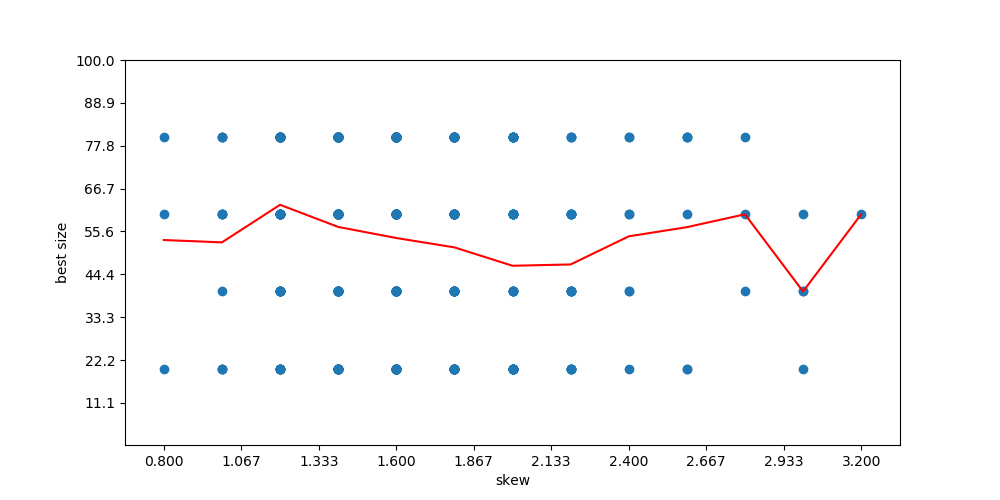

In [12]:
def plot(variable, rounding):
    pairs = [(float(round(result[variable]*(1/rounding))/(1/rounding)), float(result['bestSize'])) for result in results]
    pairs = sorted(pairs, key=lambda r:r[0])
    gammas = [p[1] for p in pairs]
    values = [p[0] for p in pairs]
    
    means = []
    meanValues = []
    allValues = set(values)
    for v in sorted(allValues):
        valueGammas = [gammas[i] for i in range(len(gammas)) if '{:.3E}'.format(values[i]) == '{:.3E}'.format(v)]
        meanValues.append(v)
        means.append(numpy.mean(valueGammas))
    
    
    
    ax, fig = plt.subplots()
    fig.set_xlabel(variable)
    fig.set_ylabel('best size')
    fig.set_xticks(numpy.linspace(numpy.min(values),numpy.max(values),10))
    fig.set_yticks(numpy.linspace(0,100,10))
    fig.set_ylim(0.2, 100.0)
    fig.xaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.xaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.scatter(values, gammas)
    fig.plot(meanValues, means, 'r')
    return fig
plot('skew', 0.2)

<IPython.core.display.Javascript object>


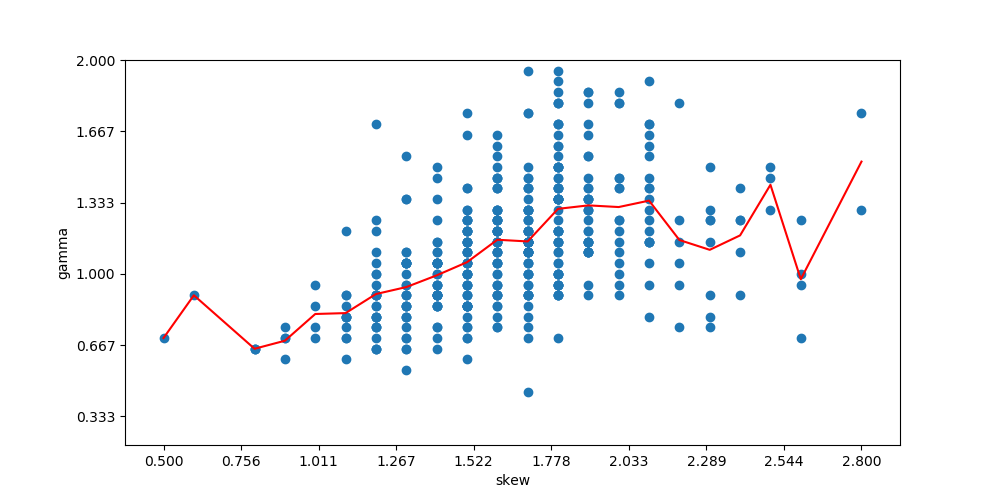

In [23]:
plot('skew', 0.1)

<IPython.core.display.Javascript object>


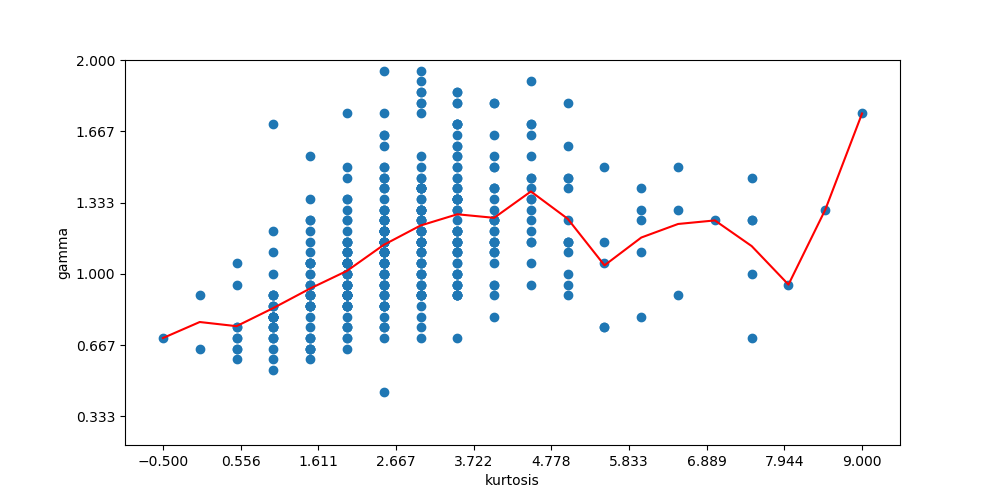

In [24]:
plot('kurtosis', 0.5)

<IPython.core.display.Javascript object>


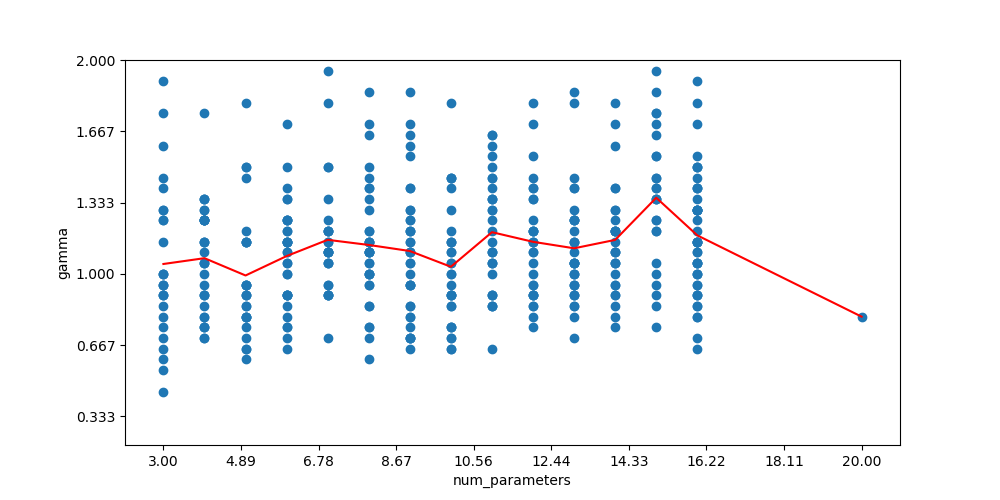

In [25]:
plot('num_parameters', 1.0)

<IPython.core.display.Javascript object>


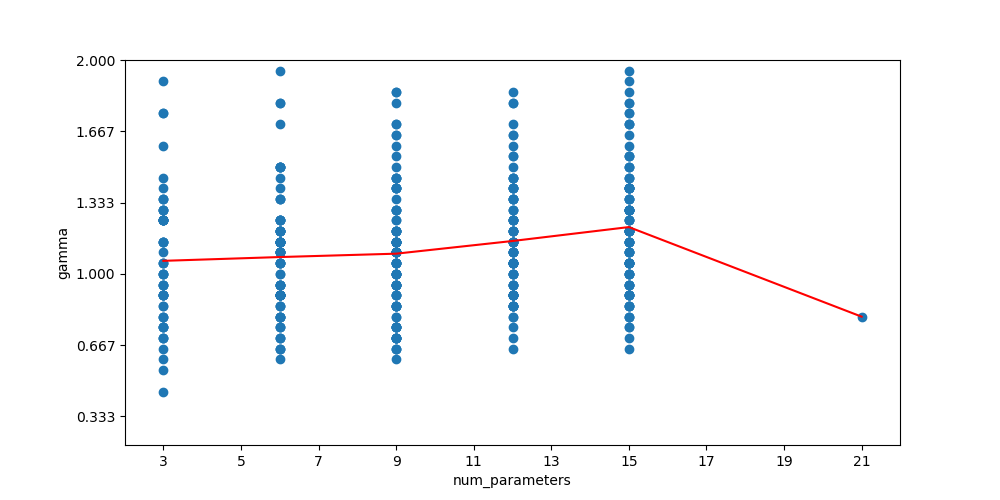

In [26]:
plot('num_parameters', 3.0)

<IPython.core.display.Javascript object>


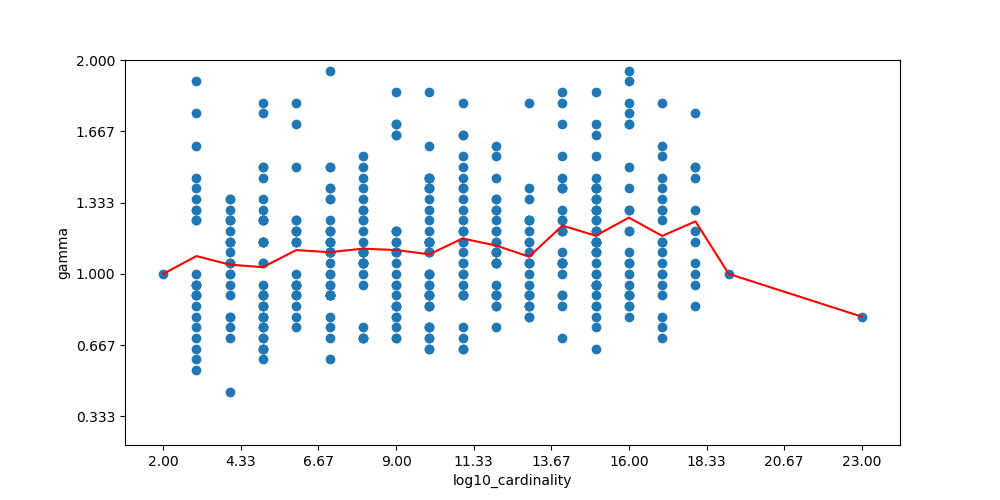

In [27]:
plot('log10_cardinality', 1.0)

<IPython.core.display.Javascript object>


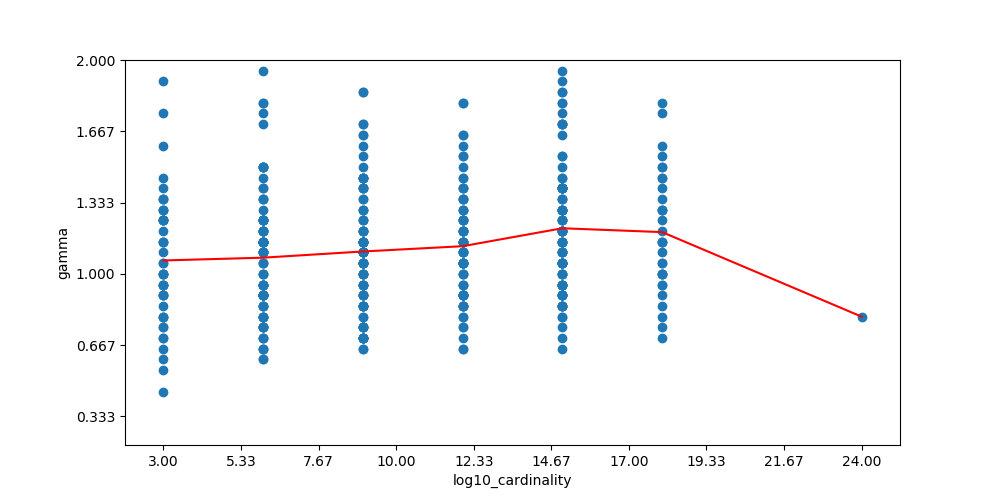

In [28]:
plot('log10_cardinality', 3.0)

<IPython.core.display.Javascript object>


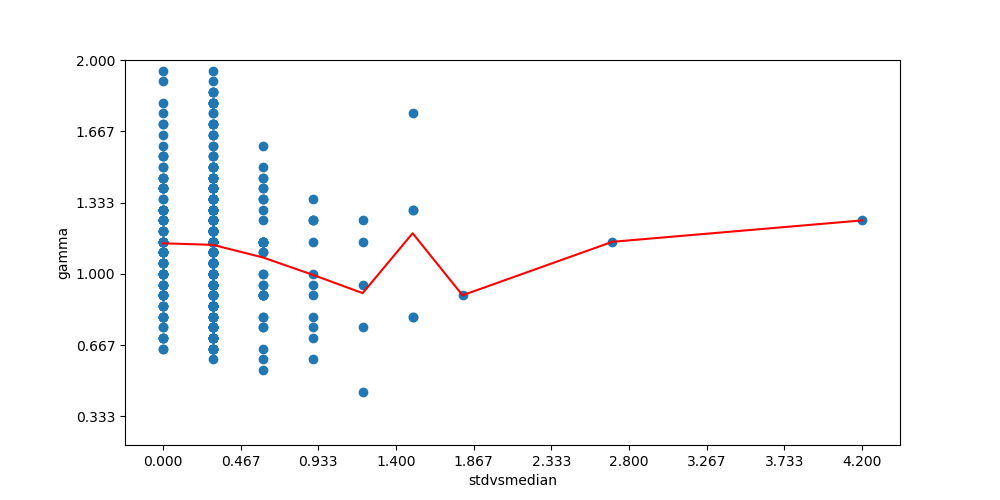

In [29]:
plot('stdvsmedian', 0.3)

In [30]:
fields = sorted(features[0].keys())
fields = [field for field in fields if 'contributions' not in field and 'interactions' not in field]
vectors = [[result[f] for f in fields] for result in features]
deviations = numpy.std(vectors, axis=0)
covarianceModel = sklearn.covariance.LedoitWolf()
covarianceModel.fit(numpy.array(vectors), numpy.array(gammas))
deviations = numpy.std(vectors, axis=0)

In [31]:
rows = []
for i,l in enumerate(fields):
    data = {fields[k]:round(100*(covarianceModel.covariance_[i][k] / (deviations[i] * deviations[k]))) if k!= i else '' for k in range(len(fields))}
    data ['field'] = fields[i]
    rows.append(data)
pd.DataFrame(rows)

,best/median,field,kurtosis,log10_cardinality,num_parameters,range,skew,std,stdvsmedian,stdvsmin
0,,best/median,1,63,64,35,2,-73,-66,-72
1,1,kurtosis,,-25,-25,-8,96,16,28,21
2,63,log10_cardinality,-25,,98,8,-26,-72,-52,-46
3,64,num_parameters,-25,98,,9,-27,-75,-54,-48
4,35,range,-8,8,9,,-6,13,-20,-19
5,2,skew,96,-26,-27,-6,,23,34,26
6,-73,std,16,-72,-75,13,23,,78,73
7,-66,stdvsmedian,28,-52,-54,-20,34,78,,95
8,-72,stdvsmin,21,-46,-48,-19,26,73,95,


In [32]:
predictors = ['skew', 'log10_cardinality', 'stdvsmedian']

filteredResults = results
filteredResults = [result for result in filteredResults if result['skew'] < 2.5]
filteredResults = [result for result in filteredResults if result['log10_cardinality'] < 18]
filteredResults = [result for result in filteredResults if result['stdvsmedian'] < 1.4]

vectors = [[result[predictor] for predictor in predictors] for result in filteredResults]
gammas = [result['gamma'] for result in filteredResults]



model = sklearn.linear_model.Ridge(alpha = .5)
model.fit(vectors, gammas)


weights = {predictors[i]: model.coef_[i] for i in range(len(predictors))}
weights['intercept'] = model.intercept_
pd.DataFrame([weights])

,intercept,log10_cardinality,skew,stdvsmedian
0,0.231779,0.011054,0.533219,-0.3043


In [33]:
def roundPrecision(number, precision=3):
    """ Rounds the given floating point number to a certain precision, for output."""
    return float(('{:.' + str(precision) + 'E}').format(number))


equation = "Gamma = " + str(roundPrecision(weights['intercept'], 1))
for predictor in predictors:
    equation += " + " + str(predictor) + " * " + str(roundPrecision(weights[predictor], 1))
print(equation)

Gamma = 0.23 + skew * 0.53 + log10_cardinality * 0.011 + stdvsmedian * -0.3
